In [56]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kadaliu\Desktop\tyler_project_ga\20240122\traffic_data\logs\trafficml.csv")
df

,File_name,path,coordinates,object,bbox,bbox_area,Count_coord,mask_area
0,111501_136.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.160937 0.333333 0.159375 0.336111 0.1515...,"1 car,","[12, 423, 782, 909]",374220.0,443,1598.0
1,111501_1395.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.226562 0.366667 0.225 0.369444 0.220312 ...,"1 car,","[216, 465, 955, 865]",295600.0,351,1571.5
2,111501_1412.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.198437 0.333333 0.196875 0.336111 0.1921...,"1 car,","[141, 419, 855, 874]",324870.0,351,1358.0
3,111501_1779.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.240625 0.344444 0.239062 0.347222 0.2359...,"1 car,","[184, 435, 922, 915]",354240.0,369,1459.0
4,111501_300.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.414062 0.5 0.4125 0.502778 0.407812 0.50...,"1 car,","[753, 631, 1524, 1130]",384729.0,391,1409.0
...,...,...,...,...,...,...,...,...
3482,175613_17987.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.478125 0.402083 0.476562 0.404167 0.4593...,"1 car,","[740, 764, 1684, 1219]",429520.0,419,1830.0
3483,175620_17998.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.367188 0.383333 0.365625 0.385417 0.3562...,"1 car,","[582, 735, 1706, 1201]",523784.0,451,1663.0
3484,175633_18005.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.470313 0.425 0.46875 0.427083 0.45625 0....,"1 car,",NaN,NaN,373,1488.0
3485,175730_18010.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.465625 0.408333 0.464062 0.410417 0.4578...,"1 car,",NaN,NaN,395,1599.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   File_name    3487 non-null   object 
 1   path         3487 non-null   object 
 2   coordinates  3487 non-null   object 
 3   object       3487 non-null   object 
 4   bbox         3454 non-null   object 
 5   bbox_area    3454 non-null   float64
 6   Count_coord  3487 non-null   int64  
 7   mask_area    3487 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 218.1+ KB


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from mpl_toolkits.basemap import Basemap


In [6]:
objt = []
for obj in df["object"].values:
    # Remove the prefix "1" and leading/trailing whitespace
    cleaned_obj = obj.replace("1", "").strip()
    objt.append(cleaned_obj)


In [7]:
df["class"] = objt
df = df.drop("object", axis = 1)
df

,File_name,path,coordinates,bbox,bbox_area,Count_coord,mask_area,class
0,111501_136.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.160937 0.333333 0.159375 0.336111 0.1515...,"[12, 423, 782, 909]",374220.0,443,1598.0,"car,"
1,111501_1395.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.226562 0.366667 0.225 0.369444 0.220312 ...,"[216, 465, 955, 865]",295600.0,351,1571.5,"car,"
2,111501_1412.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.198437 0.333333 0.196875 0.336111 0.1921...,"[141, 419, 855, 874]",324870.0,351,1358.0,"car,"
3,111501_1779.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.240625 0.344444 0.239062 0.347222 0.2359...,"[184, 435, 922, 915]",354240.0,369,1459.0,"car,"
4,111501_300.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.414062 0.5 0.4125 0.502778 0.407812 0.50...,"[753, 631, 1524, 1130]",384729.0,391,1409.0,"car,"
...,...,...,...,...,...,...,...,...
3482,175613_17987.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.478125 0.402083 0.476562 0.404167 0.4593...,"[740, 764, 1684, 1219]",429520.0,419,1830.0,"car,"
3483,175620_17998.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.367188 0.383333 0.365625 0.385417 0.3562...,"[582, 735, 1706, 1201]",523784.0,451,1663.0,"car,"
3484,175633_18005.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.470313 0.425 0.46875 0.427083 0.45625 0....,NaN,NaN,373,1488.0,"car,"
3485,175730_18010.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.465625 0.408333 0.464062 0.410417 0.4578...,NaN,NaN,395,1599.0,"car,"


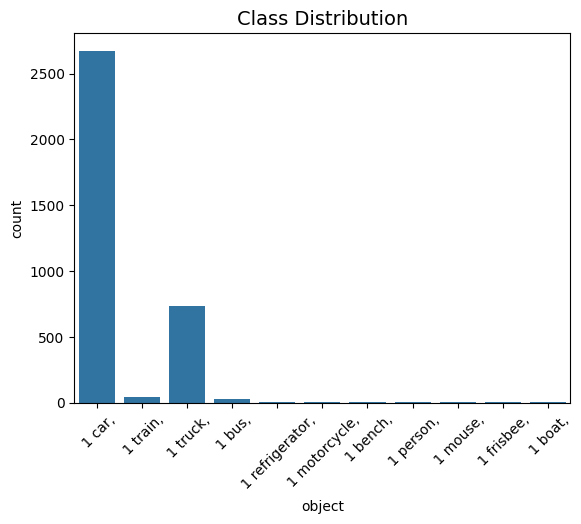

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot with the defined palette
sns.countplot(x='object', data=df)
plt.title('Class Distribution', fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()


In [54]:
import pandas as pd

# Shuffle the DataFrame
df = df.sample(frac=1)

# Separate the DataFrame into subsets based on the class labels
car_df = df[df['class'] == 'car,']
truck_df = df[df['class'] == 'truck,']

# Determine the size of the smallest class
sample_size = min(len(car_df), len(truck_df))

# Randomly sample the same number of samples from each class to match the size of the smallest class
car_df = car_df.sample(sample_size, random_state=42)
truck_df = truck_df.sample(sample_size, random_state=42)

# Concatenate the sampled subsets to create a balanced DataFrame
balanced_df = pd.concat([car_df, truck_df])

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42)

# Now, balanced_df contains a balanced dataset with equal samples of 'car' and 'truck'


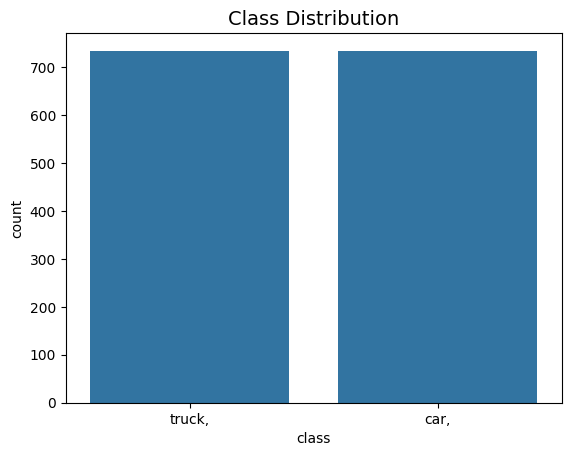

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create the countplot with the defined palette
sns.countplot(x='class', data=balanced_df)
plt.title('Class Distribution', fontsize=14)
plt.show()


In [11]:
balanced_df.isnull().sum()

File_name      0
path           0
coordinates    0
bbox           6
bbox_area      6
Count_coord    0
mask_area      0
class          0
dtype: int64

In [12]:
balanced_df.dropna()

,File_name,path,coordinates,bbox,bbox_area,Count_coord,mask_area,class
1101,144500_773.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['7 0.385937 0.408333 0.384375 0.410417 0.375 ...,"[697, 783, 1679, 1214]",423242.0,497,1711.5,"truck,"
2014,164709_10749.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.50625 0.366667 0.504687 0.369444 0.49843...,"[935, 481, 1651, 922]",315756.0,405,1422.0,"car,"
3319,165223_17344.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['7 0.451562 0.275 0.45 0.277083 0.4375 0.2770...,"[545, 525, 2469, 1283]",1458392.0,897,1748.0,"truck,"
2115,104109_13191.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.225 0.288889 0.223437 0.291667 0.214062 ...,"[379, 5, 482, 244]",24617.0,421,1415.0,"car,"
1903,152227_9350.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['2 0.515625 0.322222 0.514062 0.325 0.507812 ...,"[4, 4, 726, 243]",172558.0,395,1374.5,"car,"
...,...,...,...,...,...,...,...,...
830,122131_1717.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['7 0.432812 0.108333 0.43125 0.110417 0.375 0...,"[562, 252, 2338, 1273]",1813296.0,921,1955.5,"truck,"
645,111239_746.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['7 0.539062 0.333333 0.5375 0.335417 0.53125 ...,"[613, 644, 1721, 1213]",630452.0,559,1930.5,"truck,"
2569,124108_14497.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['7 0.5125 0.210417 0.510938 0.2125 0.504687 0...,"[357, 400, 2592, 1311]",2036085.0,1023,1819.5,"truck,"
621,110405_851.jpg,C:\Users\kadaliu\Desktop\tyler_project_ga\2024...,['7 0.459375 0.35 0.457813 0.352083 0.448437 0...,"[622, 676, 1636, 1205]",536406.0,425,1881.5,"truck,"


In [13]:
balanced_df = balanced_df.dropna()

In [14]:
balanced_df.isnull().sum()

File_name      0
path           0
coordinates    0
bbox           0
bbox_area      0
Count_coord    0
mask_area      0
class          0
dtype: int64

In [15]:
df_ml = balanced_df.drop(["File_name","path", "coordinates", "bbox"], axis = 1)
df_ml

,bbox_area,Count_coord,mask_area,class
1101,423242.0,497,1711.5,"truck,"
2014,315756.0,405,1422.0,"car,"
3319,1458392.0,897,1748.0,"truck,"
2115,24617.0,421,1415.0,"car,"
1903,172558.0,395,1374.5,"car,"
...,...,...,...,...
830,1813296.0,921,1955.5,"truck,"
645,630452.0,559,1930.5,"truck,"
2569,2036085.0,1023,1819.5,"truck,"
621,536406.0,425,1881.5,"truck,"


In [16]:
# Label encode the "class" column
df_ml['class_encoded'], class_mapping = pd.factorize(df_ml['class'])

# Drop the original "class" column if needed
# df_ml.drop(columns=["class"], inplace=True)

# Display the DataFrame with the encoded "class" column
df_ml

,bbox_area,Count_coord,mask_area,class,class_encoded
1101,423242.0,497,1711.5,"truck,",0
2014,315756.0,405,1422.0,"car,",1
3319,1458392.0,897,1748.0,"truck,",0
2115,24617.0,421,1415.0,"car,",1
1903,172558.0,395,1374.5,"car,",1
...,...,...,...,...,...
830,1813296.0,921,1955.5,"truck,",0
645,630452.0,559,1930.5,"truck,",0
2569,2036085.0,1023,1819.5,"truck,",0
621,536406.0,425,1881.5,"truck,",0


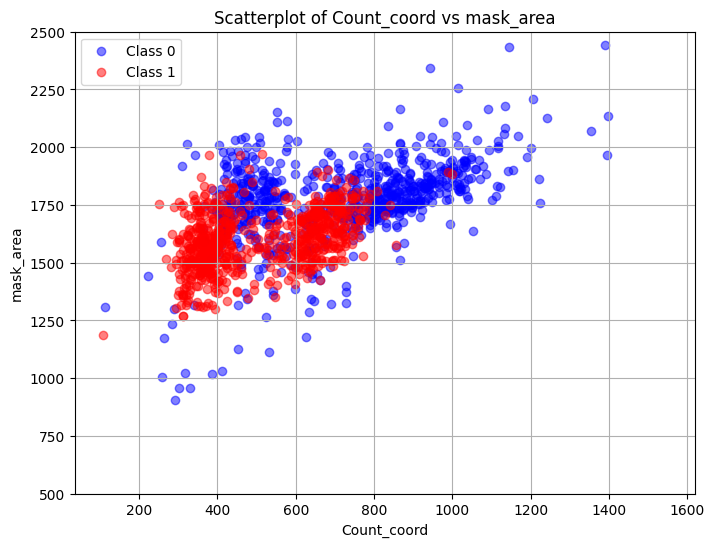

In [36]:
import matplotlib.pyplot as plt

# Extract 'Count_coord' and 'mask_area' columns from the DataFrame
count_coord = df_ml['Count_coord']
mask_area = df_ml['mask_area']
class_encoded = df_ml['class_encoded']

# Plot scatterplot for class_encoded = 0 (blue color)
plt.figure(figsize=(8, 6))
plt.scatter(count_coord[class_encoded == 0], mask_area[class_encoded == 0], color='blue', alpha=0.5, label='Class 0')

# Plot scatterplot for class_encoded = 1 (red color)
plt.scatter(count_coord[class_encoded == 1], mask_area[class_encoded == 1], color='red', alpha=0.5, label='Class 1')

plt.ylim(500, 2500)
plt.title('Scatterplot of Count_coord vs mask_area')
plt.xlabel('Count_coord')
plt.ylabel('mask_area')
plt.legend()  # Show legend with labels
plt.grid(True)
plt.show()


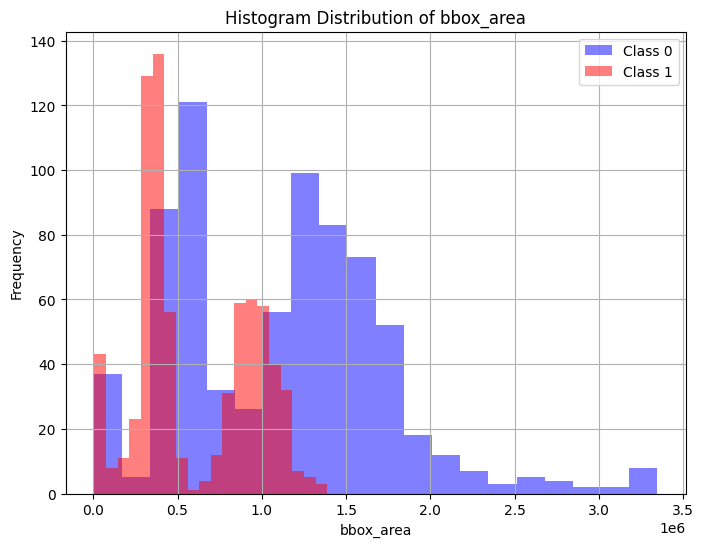

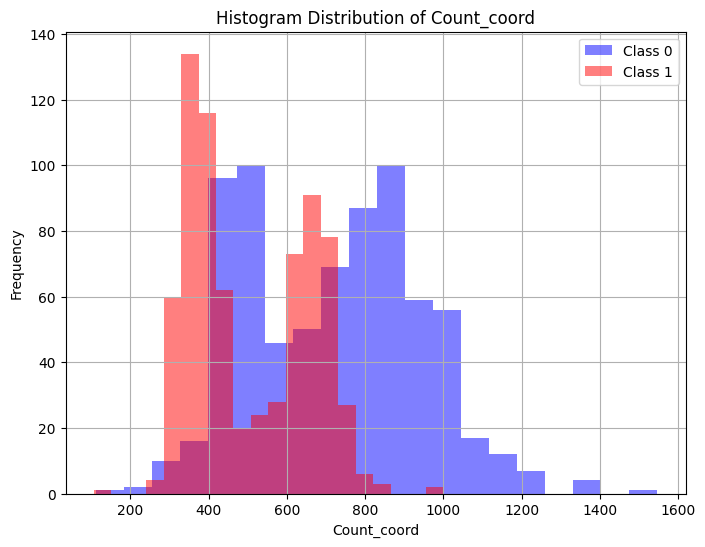

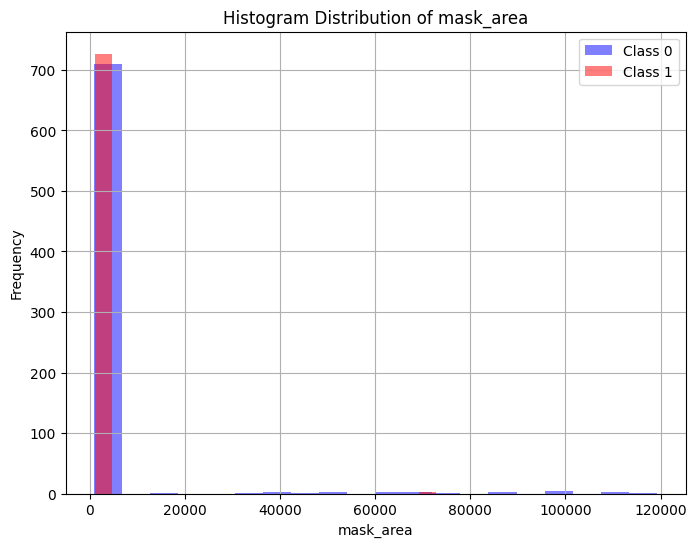

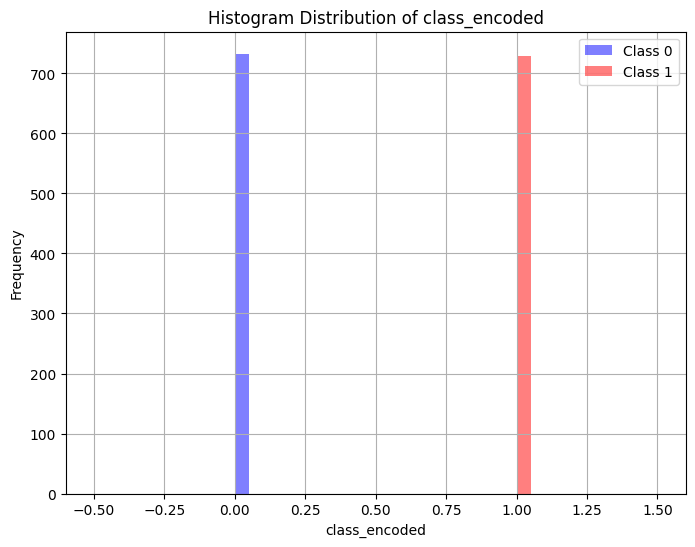

In [41]:
for i in list(df_ml.columns):
    import matplotlib.pyplot as plt

    # Separate data based on class_encoded
    bbox_area_0 = df_ml[df_ml['class_encoded'] == 0][i]
    bbox_area_1 = df_ml[df_ml['class_encoded'] == 1][i]

    # Plot histogram for class_encoded = 0 (blue color)
    plt.figure(figsize=(8, 6))
    plt.hist(bbox_area_0, color='blue', alpha=0.5, label='Class 0', bins=20)

    # Plot histogram for class_encoded = 1 (red color)
    plt.hist(bbox_area_1, color='red', alpha=0.5, label='Class 1', bins=20)

    plt.title(f'Histogram Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


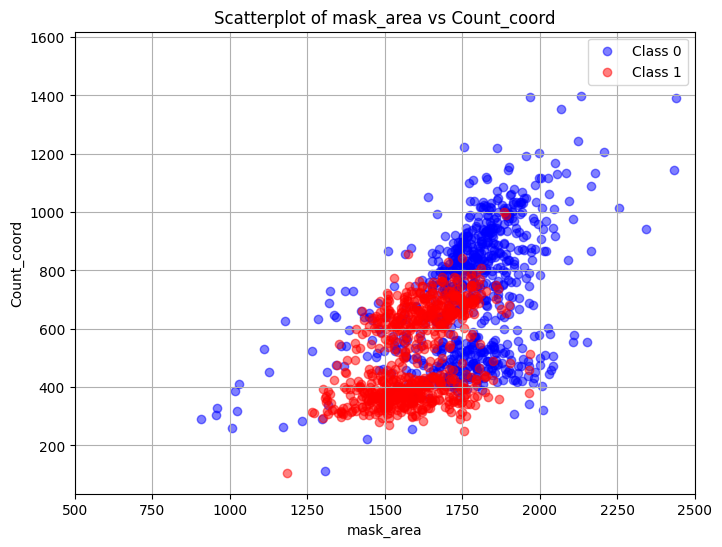

In [46]:
import matplotlib.pyplot as plt

# Extract 'Count_coord' and 'mask_area' columns from the DataFrame
count_coord = df_ml['Count_coord']
mask_area = df_ml['mask_area']
class_encoded = df_ml['class_encoded']

# Plot scatterplot for class_encoded = 0 (blue color)
plt.figure(figsize=(8, 6))
plt.scatter(mask_area[class_encoded == 0], count_coord[class_encoded == 0], color='blue', alpha=0.5, label='Class 0')

# Plot scatterplot for class_encoded = 1 (red color)
plt.scatter(mask_area[class_encoded == 1], count_coord[class_encoded == 1], color='red', alpha=0.5, label='Class 1')

plt.xlim(500, 2500)  # Swap x and y limits
plt.title('Scatterplot of mask_area vs Count_coord')  # Adjust title
plt.ylabel('Count_coord')  # Swap x and y labels
plt.xlabel('mask_area')  # Swap x and y labels
plt.legend()  # Show legend with labels
plt.grid(True)
plt.show()


In [47]:
import scipy.stats as stats

# Calculate point-biserial correlation coefficients for each continuous variable with the categorical output variable
correlations = {}
for col in df_ml.columns:
    if df_ml[col].dtype != 'object':  # Exclude non-continuous variables
        correlation, _ = stats.pointbiserialr(df_ml[col], df_ml['class_encoded'])
        correlations[col] = correlation

# Print the correlation coefficients
for col, correlation in correlations.items():
    print(f"Correlation between {col} and output_variable: {correlation:.2f}")


Correlation between bbox_area and output_variable: -0.45
Correlation between Count_coord and output_variable: -0.48
Correlation between mask_area and output_variable: -0.11
Correlation between class_encoded and output_variable: 1.00


In [48]:
df_ml = df_ml.drop("class", axis = 1)
df_ml

KeyError: "['class'] not found in axis"

In [49]:
# Define the values to predict
values_to_predict = [[982032.0, 649, 1720.0]]

# Predict using the Decision Tree classifier
dt_prediction = dt_clf.predict(values_to_predict)
print("Decision Tree Prediction:", dt_prediction)

# Predict using the Random Forest classifier
rf_prediction = rf_clf.predict(values_to_predict)
print("Random Forest Prediction:", rf_prediction)


NameError: name 'dt_clf' is not defined

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and the output variable (y)
X = df_ml[['bbox_area', 'Count_coord', 'mask_area']]
y = df_ml['class_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)


y_train_pred_dt = dt_clf.predict(X_train)
y_test_pred_dt = dt_clf.predict(X_test)

train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print("Decision Tree Classifier:")
print("Training Accuracy:", train_accuracy_dt)
print("Testing Accuracy:", test_accuracy_dt)

print("\nClassification Report for Testing Data (Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))


rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_train_pred_rf = rf_clf.predict(X_train)
y_test_pred_rf = rf_clf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("\nRandom Forest Classifier:")
print("Training Accuracy:", train_accuracy_rf)
print("Testing Accuracy:", test_accuracy_rf)

print("\nClassification Report for Testing Data (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))


Decision Tree Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.825938566552901

Classification Report for Testing Data (Decision Tree):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       146
           1       0.83      0.82      0.82       147

    accuracy                           0.83       293
   macro avg       0.83      0.83      0.83       293
weighted avg       0.83      0.83      0.83       293


Random Forest Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8771331058020477

Classification Report for Testing Data (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       146
           1       0.89      0.86      0.88       147

    accuracy                           0.88       293
   macro avg       0.88      0.88      0.88       293
weighted avg       0.88      0.88      0.88       293



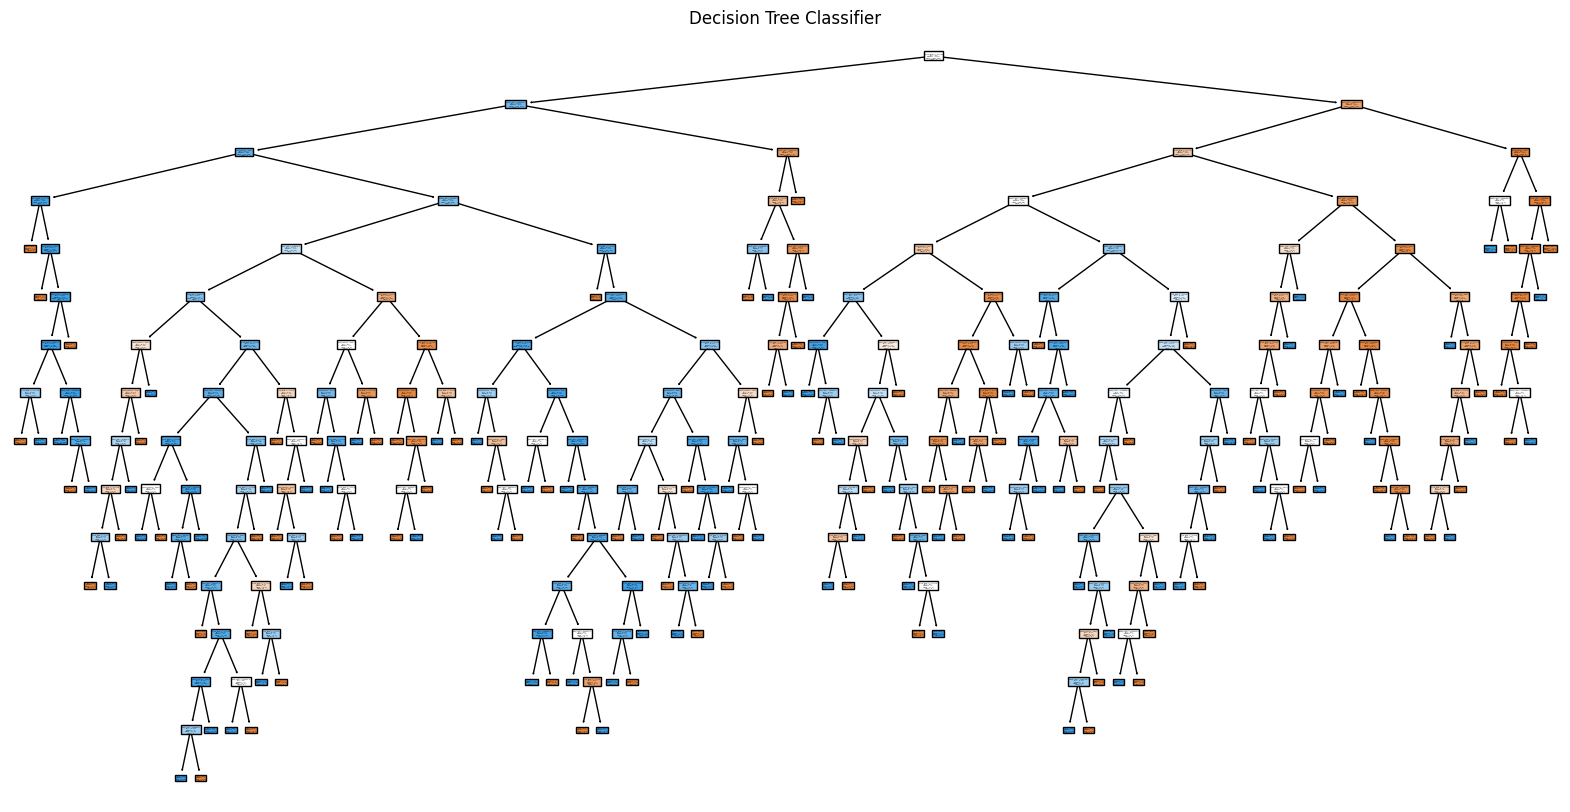

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Decision Tree Classifier")
plt.show()


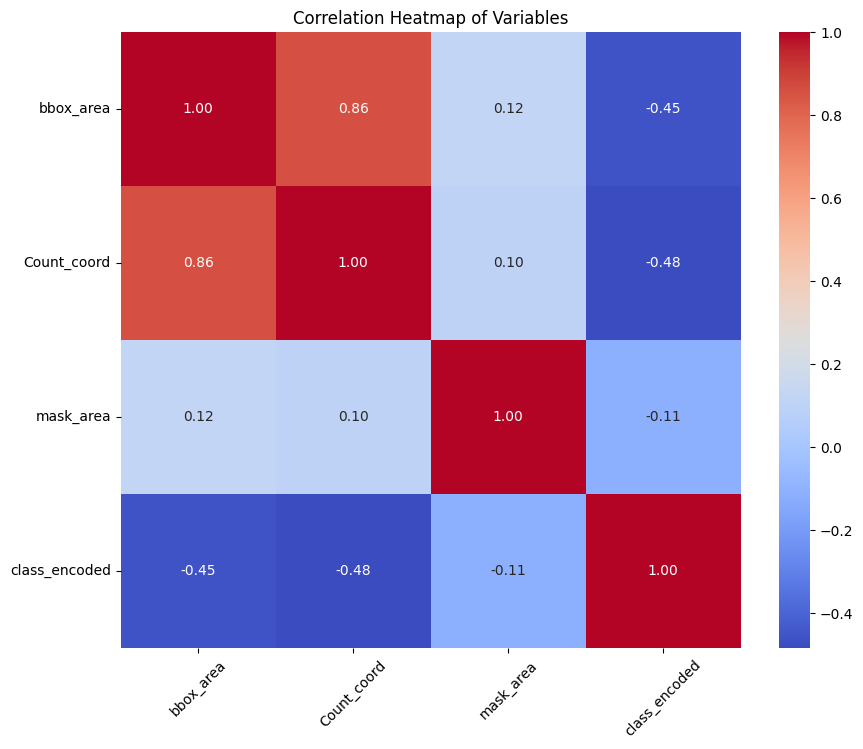

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df_ml.corr()

# Create a heatmap with labeled variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Variables')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.show()


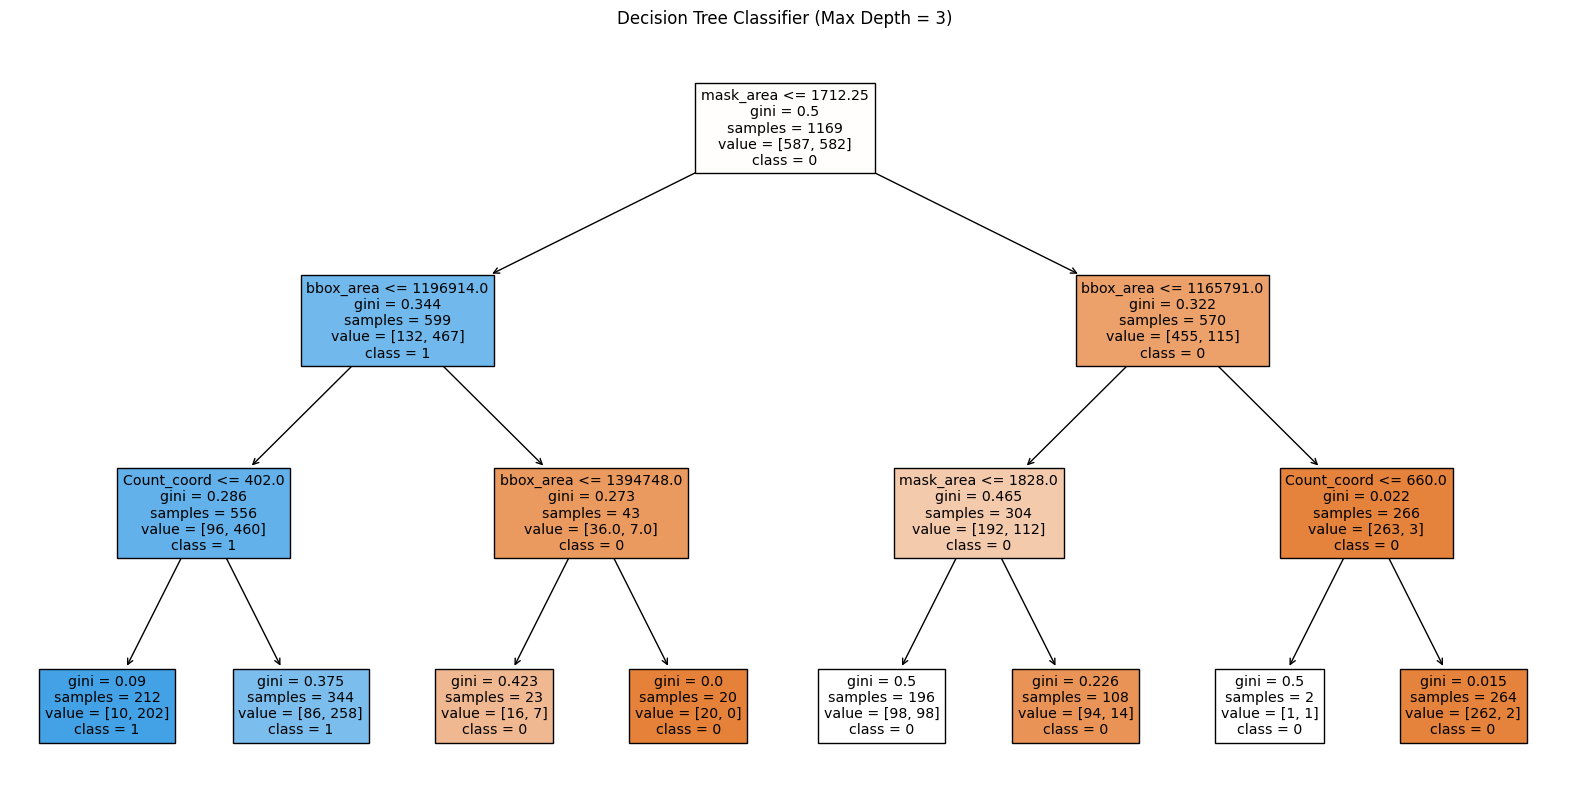

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create Decision Tree Classifier with max_depth parameter
dt_clf = DecisionTreeClassifier(max_depth=3)

# Fit the classifier to the training data
dt_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Decision Tree Classifier (Max Depth = 3)")
plt.show()


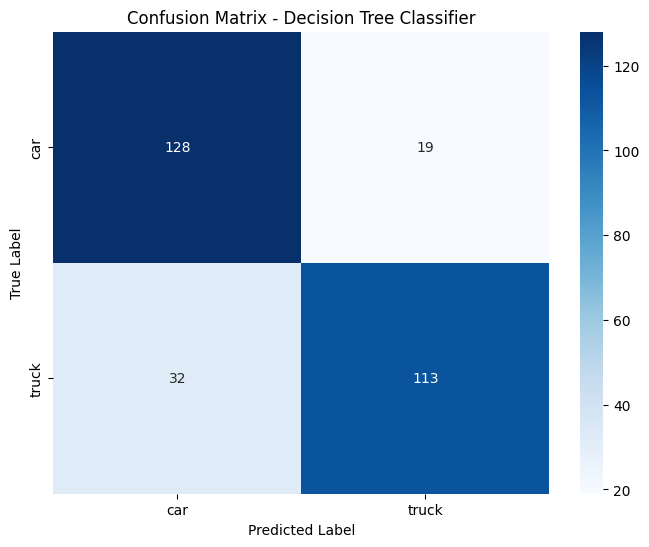

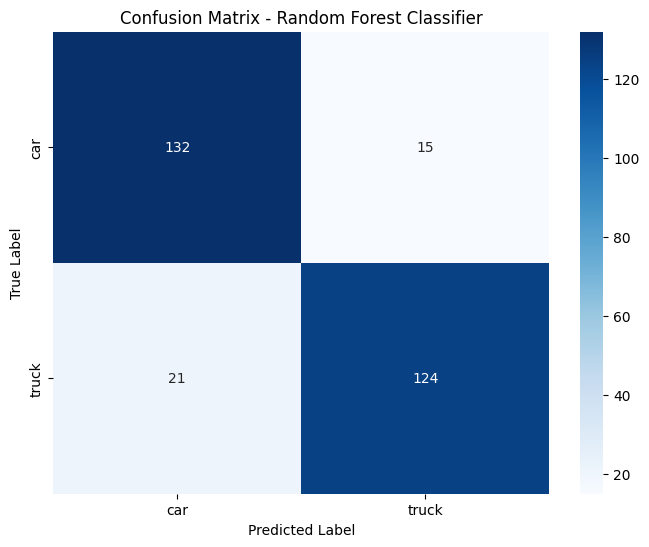

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_test_pred_dt)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["car", "truck"], yticklabels=["car", "truck"])
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cm_rf = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["car", "truck"], yticklabels=["car", "truck"])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
